In [2]:
import random
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import clear_output
import time
import copy

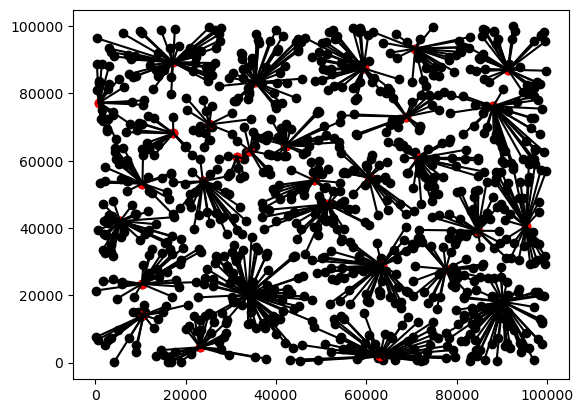

In [63]:
#Random Search

#Generate Data Inputs

# Select random seed
random.seed(1)

# Number of candidate locations
n=1000

#Number of locations to open
openfac=30

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#store best coords
best_x, best_y = None, None

#choose 15 random locations
def choose_locations(x_coords, y_coords):
    x_locations = []
    y_locations = []
    for i in range(openfac):
        added = False
        added_index = []
        while not added:
            random.seed()
            potential_loc = random.randint(0,len(x_coords) -1)
            if potential_loc not in added_index:
                x_locations.append(x_coords[potential_loc])
                y_locations.append(y_coords[potential_loc])
                added_index.append(potential_loc)
                added = True
    return x_locations, y_locations



#find closest facility for every demand point

import math
#function to plot grap
def plot_demand(coordlct_x, coordlct_y):
    plt.plot(coordlct_x, coordlct_y, 'o', color='black')
    
def plot_facils(tobuild_x, tobuild_y):
    plt.plot(tobuild_x, tobuild_y, 'o', color='red')
    

def closest_facility():
    
    #generate required random locations (openfac: no. locations to open)
    random.seed()
    tobuild_x, tobuild_y = choose_locations(coordlct_x, coordlct_y)
    
#     plot_demand(coordlct_x, coordlct_y)
#     plot_facils(tobuild_x, tobuild_y)
    

    closest_i_list = [] #index of closest facility for each demand loc
    total_distance = 0 #distance to nearest facil

    for i in range(len(coordlct_x)):

        curr_closest = math.sqrt((tobuild_x[0]-coordlct_x[i])**2 + (tobuild_y[0]-coordlct_y[i])**2)
        curr_closest_i = 0
        for n in range(1, len(tobuild_x)):
            distance = math.sqrt((tobuild_x[n]-coordlct_x[i])**2 + (tobuild_y[n]-coordlct_y[i])**2)
            if distance < curr_closest:
                
                curr_closest_i = n
                curr_closest = distance
                
                

        closest_i_list.append(curr_closest_i)
        total_distance += curr_closest


    #plot line connecting demand pt to closest facil        
#     for demand in range(len(coordlct_x)):  
#         plt.plot([tobuild_x[closest_i_list[demand]], coordlct_x[demand]], [tobuild_y[closest_i_list[demand]], coordlct_y[demand]], color='black')
        
#     clear_output(wait=True)
#     #plt.draw()
#     plt.pause(0.1)
#     plt.clf() 
    

    return total_distance, closest_i_list, tobuild_x, tobuild_y

import time

shortest = 99999999999999999999999999999
shortest_distance = []
cputime_i = []
start = time.time()#timer
curr_time = time.time()
time_now = [0,0]

while int(curr_time-start) < 60:
    curr, curr_i_list, curr_tobuild_x, curr_tobuild_y = closest_facility()
    if curr < shortest:
        #store info of current best
        shortest = curr
        closest_i_list, tobuild_x, tobuild_y = curr_i_list, curr_tobuild_x, curr_tobuild_y
        
    shortest_distance.append(shortest)
    curr_time= time.time()
    time_now=np.append(time_now, curr_time-start)
    
#print(time_now)

#plot best result
plot_demand(coordlct_x, coordlct_y)
plot_facils(tobuild_x, tobuild_y)
for demand in range(len(coordlct_x)):  
        plt.plot([tobuild_x[closest_i_list[demand]], coordlct_x[demand]], [tobuild_y[closest_i_list[demand]], coordlct_y[demand]], color='black')

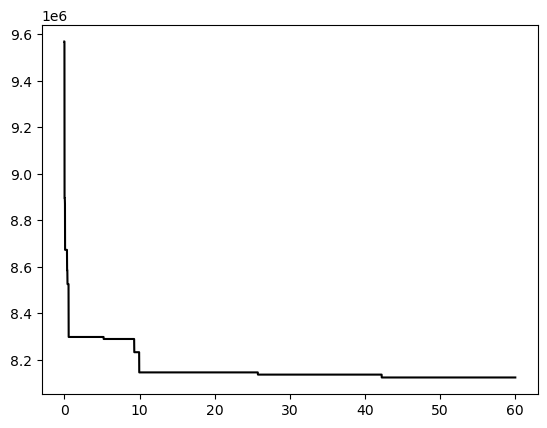

In [64]:
plt.plot(time_now[range(len(shortest_distance))],shortest_distance,'k-')

In [66]:
print(shortest_distance[-1])
zipped_coords = list(map(lambda x, y: (x, y), tobuild_x, tobuild_y))
print(zipped_coords)
print(time_now)

8123716.654311163
[(70802, 93295), (23837, 53865), (10693, 14085), (88010, 76148), (17300, 68120), (42211, 64506), (71343, 60738), (35449, 83265), (90142, 18120), (68818, 73103), (17236, 89190), (23211, 4584), (60499, 55036), (25258, 70786), (848, 77207), (31365, 61203), (51505, 47062), (95246, 40516), (91314, 87036), (48449, 54202), (84626, 39198), (63373, 28876), (10316, 23396), (77575, 27777), (5534, 42043), (10468, 53226), (33866, 20154), (34244, 62974), (59361, 87437), (62996, 1904)]
[0.00000000e+00 0.00000000e+00 7.38811493e-03 ... 5.99918344e+01
 5.99993341e+01 6.00068500e+01]


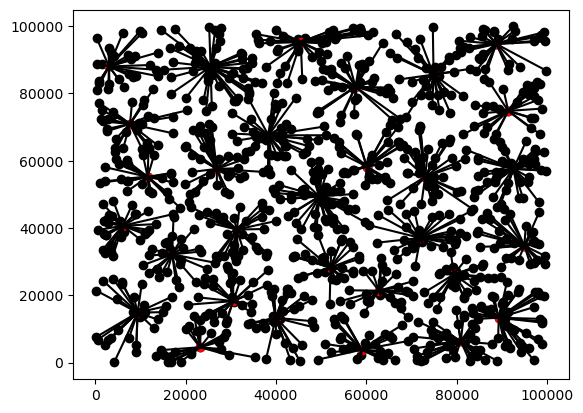

In [55]:
#Local Search 

# Select random seed
random.seed(1)

# Number of candidate locations
n=1000

#Number of locations to open
openfac=30

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#start with a list of 1 (open) and 0 (nothing) with length as number of candidate locations
#Binary encoding
to_open = []

for candidate in range(n):
    if candidate < openfac:#choose first index(no. locations) as the location to open at
        to_open.append(1)
    else: 
        to_open.append(0)

#choose list of locations based on binary list given 
def choose_locations(to_open, coordlct_x, coordlct_y):
    x_locations = []
    y_locations = []
    
    for open_here in range(len(to_open)):
        if to_open[open_here] == 1:
            x_locations.append(coordlct_x[open_here])
            y_locations.append(coordlct_y[open_here])
            
        if len(x_locations) == openfac:
            break #exit early if all locations to open added
    
    return x_locations, y_locations


#find closest facility for every demand point

import math
#function to plot grap
def plot_demand(coordlct_x, coordlct_y):
    plt.plot(coordlct_x, coordlct_y, 'o', color='black')
    
def plot_facils(tobuild_x, tobuild_y):
    plt.plot(tobuild_x, tobuild_y, 'o', color='red')
    

#
def closest_facility(to_open, coordlct_x, coordlct_y):
    
    tobuild_x, tobuild_y = choose_locations(to_open, coordlct_x, coordlct_y) #list of each coordinate to build at
    
    #plot 
    #plot_demand(coordlct_x, coordlct_y)
    #plot_facils(tobuild_x, tobuild_y)
    

    closest_i_list = [] #index of closest facility for each demand loc
    total_distance = 0 #distance to nearest facil

    for i in range(len(coordlct_x)):

        curr_closest = math.sqrt((tobuild_x[0]-coordlct_x[i])**2 + (tobuild_y[0]-coordlct_y[i])**2)
        curr_closest_i = 0
        for n in range(1, len(tobuild_x)):
            distance = math.sqrt((tobuild_x[n]-coordlct_x[i])**2 + (tobuild_y[n]-coordlct_y[i])**2)
            if distance < curr_closest:
                curr_closest_i = n
                curr_closest = distance

        closest_i_list.append(curr_closest_i)
        total_distance += curr_closest


    #plot line connecting demand pt to closest facil        
#     for demand in range(len(coordlct_x)):  
#         plt.plot([tobuild_x[closest_i_list[demand]], coordlct_x[demand]], [tobuild_y[closest_i_list[demand]], coordlct_y[demand]], color='black')
        
#     clear_output(wait=True)
#     #plt.draw()
#     plt.pause(0.1)
#     plt.clf() 

    return total_distance, closest_i_list, tobuild_x, tobuild_y

import time

shortest = 99999999999999999999999999999
shortest_distance = []
cputime_i = []
start = time.time()#timer
curr_time = time.time()
time_now = [0,0]

#assign current indexes to flip from
current_1 = 0
current_0 = openfac


while int(curr_time-start) < 60:
    
    
    #Keep looping and flipping 
    
    curr, curr_i_list, curr_tobuild_x, curr_tobuild_y = closest_facility(to_open, coordlct_x, coordlct_y)
    
    if curr < shortest:
        shortest = curr
        closest_i_list, tobuild_x, tobuild_y = curr_i_list, curr_tobuild_x, curr_tobuild_y
        
        #keep and perm next to swap if shorter
        
        #Find next 0
        random.seed()
        
        found = False
        while found == False:
            current_0 += random.randint(1,5)
            if current_0 >= n:
                current_0 = 0
            if to_open[current_0] == 0:
                found = True
            
        #Find next 1
        found = False
        while found == False:
            current_1 += random.randint(1,5)
            if current_1 >= n:
                current_1 = 0
            if to_open[current_1] == 1:
                found = True
        
        #swap both
        to_open[current_1], to_open[current_0] = to_open[current_0], to_open[current_1]
    
    else:
        
        #don't keep and perm next to swap
        
        #swap back
        to_open[current_1], to_open[current_0] = to_open[current_0], to_open[current_1]
        
        #Find next 0
        found = False
        while found == False:
            current_0 += random.randint(1,5)
            if current_0 >= n:
                current_0 = 0
            if to_open[current_0] == 0:
                found = True
            
        #Find next 1
        found = False
        while found == False:
            current_1 += random.randint(1,5)
            if current_1 >= n:
                current_1 = 0
            if to_open[current_1] == 1:
                found = True
        
        #swap both
        to_open[current_1], to_open[current_0] = to_open[current_0], to_open[current_1]
        
        
        
        
    shortest_distance.append(shortest)
    curr_time= time.time()
    time_now=np.append(time_now, curr_time-start)
    
#print(time_now)
#print(shortest_distance)

#plot best result
plot_demand(coordlct_x, coordlct_y)
plot_facils(tobuild_x, tobuild_y)
for demand in range(len(coordlct_x)):  
    plt.plot([tobuild_x[closest_i_list[demand]], coordlct_x[demand]], [tobuild_y[closest_i_list[demand]], coordlct_y[demand]], color='black')

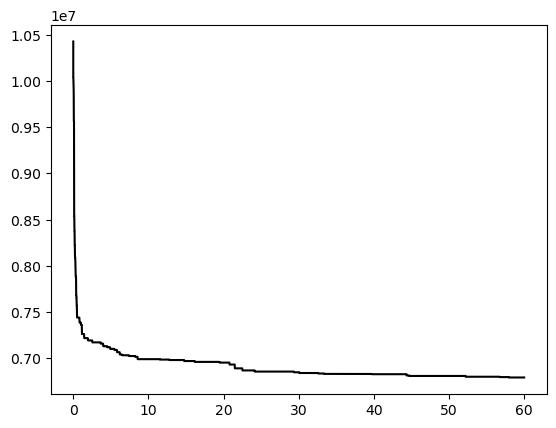

In [61]:
plt.plot(time_now[range(len(shortest_distance))],shortest_distance,'k-')

In [116]:
print(shortest_distance[-1])

zipped_coords2 = list(map(lambda x, y: (x, y), tobuild_x, tobuild_y))
print(zipped_coords2)

798170.8605265633
[(49543, 50472), (22876, 86100), (90142, 79709), (2904, 75558), (23086, 6951), (2148, 27291), (18590, 47377), (99254, 2363), (33269, 18803), (77844, 63094), (52093, 5878), (57779, 86778), (78365, 20576), (88617, 43295), (56135, 29607)]


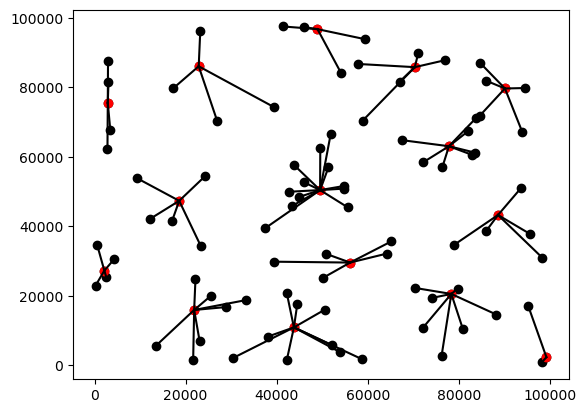

In [94]:
#Simulated Annealing 

# Select random seed
random.seed(1)

# Number of candidate locations
n=100

#Number of locations to open
openfac=15

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#start with a list of 1 (open) and 0 (nothing) with length as number of candidate locations
#Binary encoding
to_open = []

for candidate in range(n):
    if candidate < openfac:#choose first index(no. locations) as the location to open at
        to_open.append(1)
    else: 
        to_open.append(0)

#choose list of locations based on binary list given 
def choose_locations(to_open, coordlct_x, coordlct_y):
    x_locations = []
    y_locations = []
    
    for open_here in range(len(to_open)):
        if to_open[open_here] == 1:
            x_locations.append(coordlct_x[open_here])
            y_locations.append(coordlct_y[open_here])
            
        if len(x_locations) == openfac:
            break #exit early if all locations to open added
    
    return x_locations, y_locations


#find closest facility for every demand point

import math
#function to plot grap
def plot_demand(coordlct_x, coordlct_y):
    plt.plot(coordlct_x, coordlct_y, 'o', color='black')
    
def plot_facils(tobuild_x, tobuild_y):
    plt.plot(tobuild_x, tobuild_y, 'o', color='red')
    

#
def closest_facility(to_open, coordlct_x, coordlct_y):
    
    tobuild_x, tobuild_y = choose_locations(to_open, coordlct_x, coordlct_y) #list of each coordinate to build at
    
    #plot 
#     plot_demand(coordlct_x, coordlct_y)
#     plot_facils(tobuild_x, tobuild_y)
    

    closest_i_list = [] #index of closest facility for each demand loc
    total_distance = 0 #distance to nearest facil

    for i in range(len(coordlct_x)):

        curr_closest = math.sqrt((tobuild_x[0]-coordlct_x[i])**2 + (tobuild_y[0]-coordlct_y[i])**2)
        curr_closest_i = 0
        for n in range(1, len(tobuild_x)):
            distance = math.sqrt((tobuild_x[n]-coordlct_x[i])**2 + (tobuild_y[n]-coordlct_y[i])**2)
            if distance < curr_closest:
                curr_closest_i = n
                curr_closest = distance

        closest_i_list.append(curr_closest_i)
        total_distance += curr_closest


    #plot line connecting demand pt to closest facil        
#     for demand in range(len(coordlct_x)):  
#         plt.plot([tobuild_x[closest_i_list[demand]], coordlct_x[demand]], [tobuild_y[closest_i_list[demand]], coordlct_y[demand]], color='black')
        
#     clear_output(wait=True)
#     #plt.draw()
#     plt.pause(0.1)
#     plt.clf() 

    return total_distance, closest_i_list, tobuild_x, tobuild_y

import time

prev = 99999999999999999999999999999
shortest = 99999999999999999999999999999
curr_distance = []
cputime_i = []
start = time.time()#timer
curr_time = time.time()
time_now = [0,0]
probability_list = []
shortest_distance = []

#assign current indexes to flip from
current_1 = 0
current_0 = openfac

initial_temp = 15000
alpha = 0.9999
iteration = 1

while int(curr_time-start) < 30:
    iteration += 1 #for us in calc probability
    
    #Keep looping and flipping 
    curr, curr_i_list, curr_tobuild_x, curr_tobuild_y = closest_facility(to_open, coordlct_x, coordlct_y)
    
    if curr > shortest:
        if initial_temp*(alpha**iteration) != 0:
            probability = (math.e**((prev-curr)/ (initial_temp*(alpha**iteration))))*100
        else:
            probability = 0
            
        
        probability_list.append(probability)
        
        random.seed()
        random_number = random.randint(1,100)
            
        if random_number < probability: #swap if 
            prev = curr

        else:   #swap back
            
            to_open[current_1], to_open[current_0] = to_open[current_0], to_open[current_1]
            
    else:
        shortest = curr
        closest_i_list, tobuild_x, tobuild_y = curr_i_list, curr_tobuild_x, curr_tobuild_y
        
        prev = curr
        
    #perm next to swap

    #Find next 0
    random.seed()
    found = False
    while found == False:
        current_0 += random.randint(1,5)
        if current_0 >= n:
            current_0 = 0
        if to_open[current_0] == 0:
            found = True

    #Find next 1
    found = False
    while found == False:
        current_1 += random.randint(1,5)
        if current_1 >= n:
            current_1 = 0
        if to_open[current_1] == 1:
            found = True

    #swap both
    to_open[current_1], to_open[current_0] = to_open[current_0], to_open[current_1]
    curr_distance.append(prev)
    shortest_distance.append(shortest)
    curr_time= time.time()
    time_now=np.append(time_now, curr_time-start)
    

#plot best result
plot_demand(coordlct_x, coordlct_y)
plot_facils(tobuild_x, tobuild_y)
for demand in range(len(coordlct_x)):  
    plt.plot([tobuild_x[closest_i_list[demand]], coordlct_x[demand]], [tobuild_y[closest_i_list[demand]], coordlct_y[demand]], color='black') 

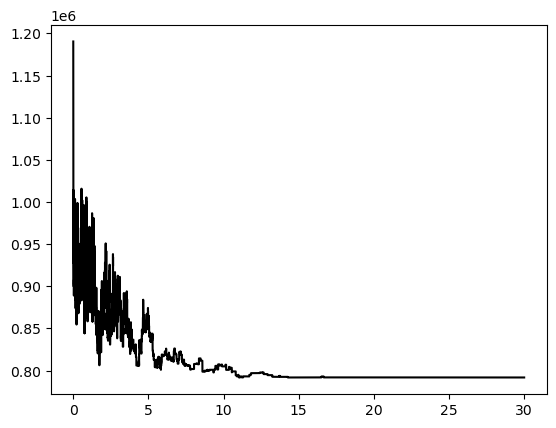

In [95]:
plt.plot(time_now[range(len(curr_distance))],curr_distance,'k-')

In [97]:
print(shortest_distance[-1])
zipped_coords = list(map(lambda x, y: (x, y), tobuild_x, tobuild_y))
print(zipped_coords)

791736.9605361611
[(49543, 50472), (22876, 86100), (90142, 79709), (2904, 75558), (43788, 10948), (21878, 15962), (2148, 27291), (18590, 47377), (99254, 2363), (77844, 63094), (48969, 96790), (70338, 85851), (78365, 20576), (88617, 43295), (56135, 29607)]


[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]


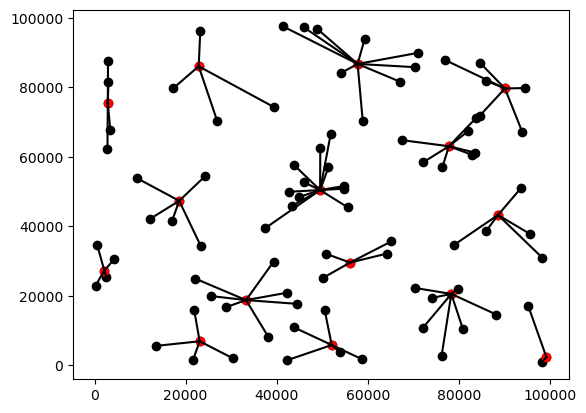

In [114]:
#Local Search 

# Select random seed
random.seed(1)

# Number of candidate locations
n=100

#Number of locations to open
openfac=15

#Coordinate Range
rangelct=100000

#Generate random locations
coordlct_x = random.choices(range(0, rangelct), k=n)
coordlct_y = random.choices(range(0, rangelct), k=n)

#start with a list of 1 (open) and 0 (nothing) with length as number of candidate locations
#Binary encoding
to_open = []

for candidate in range(n):
    if candidate < openfac:#choose first index(no. locations) as the location to open at
        to_open.append(1)
    else: 
        to_open.append(0)

#choose list of locations based on binary list given 
def choose_locations(to_open, coordlct_x, coordlct_y):
    x_locations = []
    y_locations = []
    
    for open_here in range(len(to_open)):
        if to_open[open_here] == 1:
            x_locations.append(coordlct_x[open_here])
            y_locations.append(coordlct_y[open_here])
            
        if len(x_locations) == openfac:
            break #exit early if all locations to open added
    
    return x_locations, y_locations


#find closest facility for every demand point

import math
#function to plot grap
def plot_demand(coordlct_x, coordlct_y):
    plt.plot(coordlct_x, coordlct_y, 'o', color='black')
    
def plot_facils(tobuild_x, tobuild_y):
    plt.plot(tobuild_x, tobuild_y, 'o', color='red')
    

#
def closest_facility(to_open, coordlct_x, coordlct_y):
    
    tobuild_x, tobuild_y = choose_locations(to_open, coordlct_x, coordlct_y) #list of each coordinate to build at
    
    #plot 
    #plot_demand(coordlct_x, coordlct_y)
    #plot_facils(tobuild_x, tobuild_y)
    

    closest_i_list = [] #index of closest facility for each demand loc
    total_distance = 0 #distance to nearest facil

    for i in range(len(coordlct_x)):

        curr_closest = math.sqrt((tobuild_x[0]-coordlct_x[i])**2 + (tobuild_y[0]-coordlct_y[i])**2)
        curr_closest_i = 0
        for n in range(1, len(tobuild_x)):
            distance = math.sqrt((tobuild_x[n]-coordlct_x[i])**2 + (tobuild_y[n]-coordlct_y[i])**2)
            if distance < curr_closest:
                curr_closest_i = n
                curr_closest = distance

        closest_i_list.append(curr_closest_i)
        total_distance += curr_closest


    #plot line connecting demand pt to closest facil        
#     for demand in range(len(coordlct_x)):  
#         plt.plot([tobuild_x[closest_i_list[demand]], coordlct_x[demand]], [tobuild_y[closest_i_list[demand]], coordlct_y[demand]], color='black')
        
#     clear_output(wait=True)
#     #plt.draw()
#     plt.pause(0.1)
#     plt.clf() 

    return total_distance, closest_i_list, tobuild_x, tobuild_y

import time

shortest = 99999999999999999999999999999
shortest_distance = []
cputime_i = []
start = time.time()#timer
curr_time = time.time()
time_now = [0,0]

#assign current indexes to flip from
current_1 = 0
current_0 = openfac


while int(curr_time-start) < 30:
    
    
    #Keep looping and flipping 
    
    curr, curr_i_list, curr_tobuild_x, curr_tobuild_y = closest_facility(to_open, coordlct_x, coordlct_y)
    
    if curr < shortest:
        shortest = curr
        closest_i_list, tobuild_x, tobuild_y = curr_i_list, curr_tobuild_x, curr_tobuild_y
        
        #keep and perm next to swap if shorter
        
        #Find next 0
        random.seed()
        
        found = False
        while found == False:
            current_0 += random.randint(1,5)
            if current_0 >= n:
                current_0 = 0
            if to_open[current_0] == 0:
                found = True
            
        #Find next 1
        found = False
        while found == False:
            current_1 += random.randint(1,5)
            if current_1 >= n:
                current_1 = 0
            if to_open[current_1] == 1:
                found = True
        
        #swap both
        to_open[current_1], to_open[current_0] = to_open[current_0], to_open[current_1]
    
    else:
        
        #don't keep and perm next to swap
        
        #swap back
        to_open[current_1], to_open[current_0] = to_open[current_0], to_open[current_1]
        
        #Find next 0
        found = False
        while found == False:
            current_0 += random.randint(1,5)
            if current_0 >= n:
                current_0 = 0
            if to_open[current_0] == 0:
                found = True
            
        #Find next 1
        found = False
        while found == False:
            current_1 += random.randint(1,5)
            if current_1 >= n:
                current_1 = 0
            if to_open[current_1] == 1:
                found = True
        
        #swap both
        to_open[current_1], to_open[current_0] = to_open[current_0], to_open[current_1]
        
        
        
        
    shortest_distance.append(shortest)
    curr_time= time.time()
    time_now=np.append(time_now, curr_time-start)
    
#print(time_now)
#print(shortest_distance)

#plot best result
plot_demand(coordlct_x, coordlct_y)
plot_facils(tobuild_x, tobuild_y)
for demand in range(len(coordlct_x)):  
    plt.plot([tobuild_x[closest_i_list[demand]], coordlct_x[demand]], [tobuild_y[closest_i_list[demand]], coordlct_y[demand]], color='black')

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

798170.8605265633

[(49543, 50472), (22876, 86100), (90142, 79709), (2904, 75558), (23086, 6951), (2148, 27291), (18590, 47377), (99254, 2363), (33269, 18803), (77844, 63094), (57779, 86778), (45913, 97377), (78365, 20576), (88617, 43295), (56135, 29607)]
[(49543, 50472), (22876, 86100), (90142, 79709), (2904, 75558), (23086, 6951), (2148, 27291), (18590, 47377), (99254, 2363), (33269, 18803), (77844, 63094), (52093, 5878), (57779, 86778), (78365, 20576), (88617, 43295), (56135, 29607)]


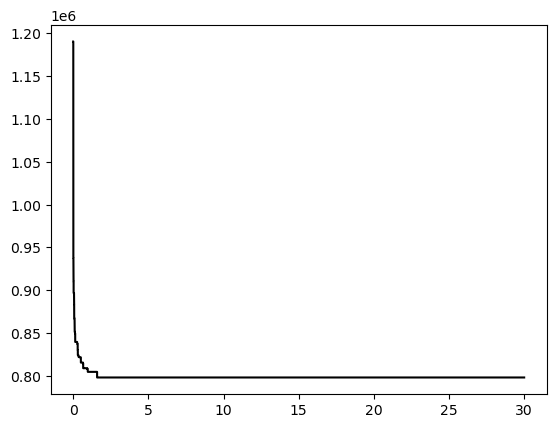

In [115]:
plt.plot(time_now[range(len(shortest_distance))],shortest_distance,'k-')

print(to_open)
print()

print(shortest_distance[-1])
#zipped_coords = list(map(lambda x, y: (x, y), coordlct_x, coordlct_y))
#print(zipped_coords)
zipped_coords = []
for i in range(len(to_open)):
    if to_open[i] == 1:
        zipped_coords.append((coordlct_x[i],coordlct_y[i]))

print()
print(zipped_coords)
zipped_coords2 = list(map(lambda x, y: (x, y), tobuild_x, tobuild_y))
print(zipped_coords2)